## CORRECTOR-TO-BPM RESPONSE MATRIX

The modelling of the linear optics uses the orbit response matrix (ORM) of N BPMs and M correctors defined as
$$ C_{ij}=\frac{\Delta x_i}{\Delta \theta_j} $$
where $\Delta x_i$ is the orbit change at the beam position monitor (BPM) i and $\Delta \theta_j$ is the kick of a corrector magnet  j. 

An accelerator with m-BPMS and n-correctors produces an m x n dimensional response
matrix.

$$C_{mn}=\frac{\sqrt{\beta_m\beta_n}}{2\sin(\pi \nu)}\cos(\pi\nu -\phi(s)+\phi(s_0))$$

The elements of c may be obtained from the machine model or be determined
experimentally by measuring the deviation at each BPM resulting from exciting
each corrector individually.

The task of the orbit correction is to find a set of corrector kicks $\theta$. that satisfy the
following relation:
$\Delta x + C\Delta\theta =0$


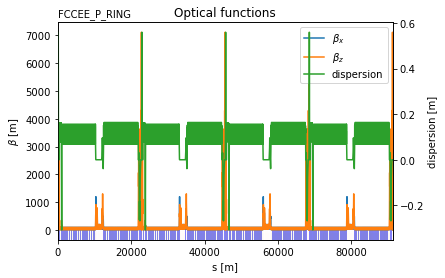

(<AxesSubplot:title={'left':'FCCEE_P_RING','center':'Optical functions'}, xlabel='s [m]', ylabel='$\\beta$ [m]'>,
 <AxesSubplot:ylabel='dispersion [m]'>,
 <AxesSubplot:>)

In [1]:
import at
from at.plot import plot_beta
import time
import matplotlib.pyplot as plt
#import modules
from at_modules_w_eta_orbit import *

ring = at.load_mat('fccee_t_v22.mat', key='RING')
ring.radiation_off()


#from modules import show_lindata
#show_lindata(lat=r, refpts=range(len(r)))

ring.plot_beta()

#plt.show()

Closed orbit before errors


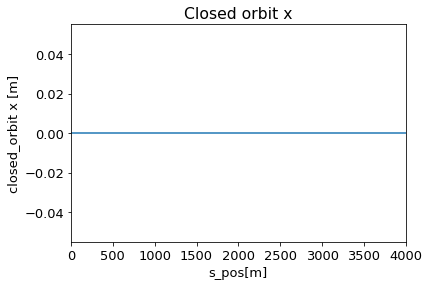

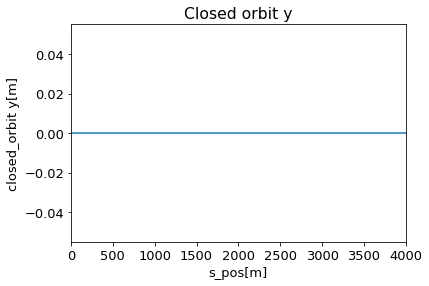

In [2]:
print("Closed orbit before errors")
plot_closedOrbit(ring, '*')
#plt.savefig('show_lindata1.png',bbox_inches='tight', pad_inches=0., dpi=500)



In [3]:
from at import get_refpts
element_indexes = get_refpts(ring, "*")
quad_indexes = get_refpts(ring,at.elements.Quadrupole)
sext_indexes = get_refpts(ring,at.elements.Sextupole)
bend_indexes = get_refpts(ring, at.elements.Dipole)
marker_indexes = get_refpts(ring, at.elements.Marker)
BPM_indexes = get_refpts(ring, at.elements.Monitor)
drift_indexes = get_refpts(ring , at.elements.Drift)
corrector_indexes = get_refpts(ring , at.elements.Corrector)

In [4]:
quad_indexes

array([    3,     5,     7, ..., 17798, 17800, 17802], dtype=uint32)

In [5]:
BPM_indexes

array([], dtype=uint32)

In [6]:
quad_indexes = get_refpts(ring,at.elements.Quadrupole)
for i in reversed(quad_indexes):
    BPM = elements.Monitor('BPM', K = 0.0)
    ring.insert(i+1, BPM)

In [7]:
quad_indexes = get_refpts(ring,at.elements.Quadrupole)
print('quad ',quad_indexes)
bpm_indexes = get_refpts(ring,at.elements.Monitor)
print('bpm ',bpm_indexes)

quad  [    3     6     9 ... 21119 21122 21125]
bpm  [    4     7    10 ... 21120 21123 21126]


In [8]:
ring

Lattice([Marker('fccee_p_ring$start', NumIntSteps=40, length=array(0.)), Marker('ip.1', NumIntSteps=40, length=array(0.)), Drift('drift_0', 2.2002250210956804), Quadrupole('qc1l1.1', 0.7, -0.16097717432405162, NumIntSteps=40), Monitor('BPM', K=0.0), Drift('drift_1', 0.08000000000000007), Quadrupole('qc1r2.1', 1.25, -0.16409289579016573, NumIntSteps=40), Monitor('BPM', K=0.0), Drift('drift_2', 0.08000000000000007), Quadrupole('qc1r3.1', 1.25, -0.14551404073944188, NumIntSteps=40), Monitor('BPM', K=0.0), Drift('drift_3', 0.2999999999999998), Quadrupole('qc2r1.1', 1.25, 0.0449384431977077, NumIntSteps=40), Monitor('BPM', K=0.0), Drift('drift_4', 0.08000000000000096), Quadrupole('qc2r2.1', 1.25, 0.15845771736262967, NumIntSteps=40), Monitor('BPM', K=0.0), Marker('pqc2re.1', NumIntSteps=40, length=array(0.)), Drift('drift_5', 2.287040982551119), Quadrupole('qt1.1', 1.0, 0.007256447615584834, NumIntSteps=40), Monitor('BPM', K=0.0), Drift('drift_6', 2.287040982551119), Quadrupole('qc3.1', 3.5

In [9]:
bpm_indexes = get_refpts(ring,at.elements.Monitor)
for i in reversed(bpm_indexes):
    Cor = CXY = elements.Corrector('CXY'+str(i), 0, [0, 0])
    ring.insert(i+1, Cor)

In [10]:
corrector_indexes = get_refpts(ring , at.elements.Corrector)
corrector_indexes


array([    5,     9,    13, ..., 24442, 24446, 24450], dtype=uint32)

In [11]:
bpm_indexes = get_refpts(ring,at.elements.Monitor)
bpm_indexes

array([    4,     8,    12, ..., 24441, 24445, 24449], dtype=uint32)

In [12]:
quad_indexes = get_refpts(ring , at.elements.Quadrupole)
quad_indexes

array([    3,     7,    11, ..., 24440, 24444, 24448], dtype=uint32)

In [13]:
ring

Lattice([Marker('fccee_p_ring$start', NumIntSteps=40, length=array(0.)), Marker('ip.1', NumIntSteps=40, length=array(0.)), Drift('drift_0', 2.2002250210956804), Quadrupole('qc1l1.1', 0.7, -0.16097717432405162, NumIntSteps=40), Monitor('BPM', K=0.0), Corrector('CXY4', 0.0, array([0., 0.])), Drift('drift_1', 0.08000000000000007), Quadrupole('qc1r2.1', 1.25, -0.16409289579016573, NumIntSteps=40), Monitor('BPM', K=0.0), Corrector('CXY7', 0.0, array([0., 0.])), Drift('drift_2', 0.08000000000000007), Quadrupole('qc1r3.1', 1.25, -0.14551404073944188, NumIntSteps=40), Monitor('BPM', K=0.0), Corrector('CXY10', 0.0, array([0., 0.])), Drift('drift_3', 0.2999999999999998), Quadrupole('qc2r1.1', 1.25, 0.0449384431977077, NumIntSteps=40), Monitor('BPM', K=0.0), Corrector('CXY13', 0.0, array([0., 0.])), Drift('drift_4', 0.08000000000000096), Quadrupole('qc2r2.1', 1.25, 0.15845771736262967, NumIntSteps=40), Monitor('BPM', K=0.0), Corrector('CXY16', 0.0, array([0., 0.])), Marker('pqc2re.1', NumIntSteps

In [14]:
ring.save('./fccee_t_v22_b_c.mat', mat_key='ring')